In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nandavardhan56","key":"3cdd5c3ddc24159a449cda14dbf6b7e0"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets list -s "sentimental analysis"

ref                                                         title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
gargmanas/sentimental-analysis-for-tweets                   Sentimental Analysis for Tweets                        487192  2021-05-03 04:10:44.557000           8260        122  1.0              
cosmos98/twitter-and-reddit-sentimental-analysis-dataset    Twitter and Reddit Sentimental analysis Dataset      10534046  2019-11-28 14:00:34.833000          20400        159  1.0              
sudarsan27/sentimental-analysis-movie-review                Sentimental analysis - Movie review                     77821  2024-07-13 15:51:08.497000           1423         32  1.0              
cpluzshrijayan/swiggy-twe

In [4]:
!kaggle datasets download -d "cpluzshrijayan/swiggy-tweet"

Dataset URL: https://www.kaggle.com/datasets/cpluzshrijayan/swiggy-tweet
License(s): unknown
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 611MB/s]


In [5]:
!unzip swiggy-tweet.zip

Archive:  swiggy-tweet.zip
  inflating: swiggydataset.csv       


In [7]:
import pandas as pd
df = pd.read_csv("swiggydataset.csv")

In [8]:
df.head()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,False,syamantak1,1,"6,19,59,419"
1,7/18/2019 22:43,0,102,129,@SwiggyCares I hope so.,0,False,Bharatbbhushn,2,"14,32,84,383"
2,7/18/2019 22:37,0,102,129,@SwiggyCares I think you have the order detail...,0,False,Bharatbbhushn,3,"14,32,84,383"
3,7/18/2019 22:35,0,13,16,"@swiggy_in People are complaining here also, i...",0,False,taifkhalid01,4,"8,30,34,00,00,00,00,00,000"
4,7/18/2019 22:25,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,False,Bharatbbhushn,5,"14,32,84,383"


In [11]:
positive_words = ["good", "great", "love", "awesome", "nice", "excellent", "happy", "delight"]
negative_words = ["bad", "terrible", "hate", "awful", "worst", "angry", "delay", "complain", "issue"]


def simple_sentiment(text):
    text = str(text).lower()
    pos_score = sum(word in text for word in positive_words)
    neg_score = sum(word in text for word in negative_words)

    if pos_score > neg_score:
        return "Positive"
    elif neg_score > pos_score:
        return "Negative"
    else:
        return "Neutral"


In [12]:
df["Sentiment"] = df["full_text"].apply(simple_sentiment)

                   date  favorite_count  followers_count  friends_count  \
0       7/18/2019 22:47               0               82            219   
1       7/18/2019 22:43               0              102            129   
2       7/18/2019 22:37               0              102            129   
3       7/18/2019 22:35               0               13             16   
4       7/18/2019 22:25               0              102            129   
...                 ...             ...              ...            ...   
16707  07-11-2019 12:13               0                0              2   
16708  07-11-2019 12:12               0              106            146   
16709  07-11-2019 12:11               0               91            248   
16710  07-11-2019 12:11               0                0              2   
16711  07-11-2019 12:09               0               54            163   

                                               full_text  retweet_count  \
0      @Mahi_2510 @swigg

In [14]:
print(df["Sentiment"].value_counts())


Sentiment
Neutral     13339
Negative     2567
Positive      806
Name: count, dtype: int64


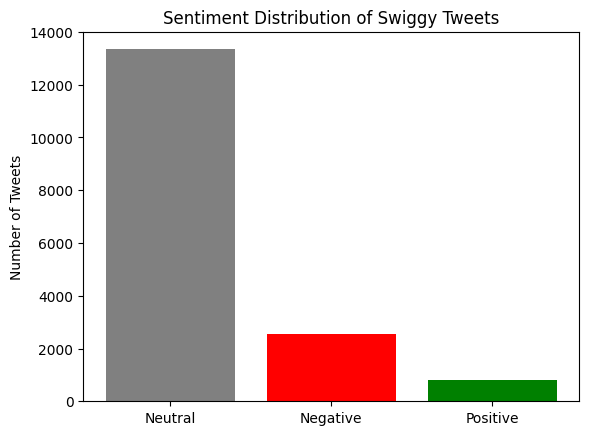

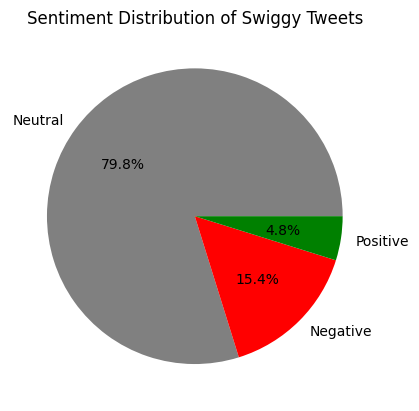

In [15]:
import matplotlib.pyplot as plt

sentiment_counts = {"Neutral": 13339, "Negative": 2567, "Positive": 806}

# Bar chart
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=["gray", "red", "green"])
plt.title("Sentiment Distribution of Swiggy Tweets")
plt.ylabel("Number of Tweets")
plt.show()

# Pie chart (optional)
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', colors=["gray", "red", "green"])
plt.title("Sentiment Distribution of Swiggy Tweets")
plt.show()


In [22]:
df = df[['full_text', 'Sentiment']]  # Assuming you already have Sentiment labeled
df = df.dropna()
df.head()

,full_text,Sentiment
0,@Mahi_2510 @swiggy_in The ultimate answer will...,Neutral
1,@SwiggyCares I hope so.,Neutral
2,@SwiggyCares I think you have the order detail...,Neutral
3,"@swiggy_in People are complaining here also, i...",Negative
4,@SwiggyCares Do you even know the meaning of y...,Neutral


In [23]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'@\w+', '', text)           # remove mentions
    text = re.sub(r'http\S+|www\S+', '', text) # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)       # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text)           # remove extra spaces
    return text.strip()

df['clean_text'] = df['full_text'].apply(clean_text)


In [25]:
from sklearn.utils import resample
# Assuming Sentiment column exists from your previous analysis
neutral = df[df['Sentiment']=="Neutral"]
negative = df[df['Sentiment']=="Negative"]
positive = df[df['Sentiment']=="Positive"]

# Oversample Negative & Positive to match Neutral
negative_upsampled = resample(negative, replace=True, n_samples=len(neutral), random_state=42)
positive_upsampled = resample(positive, replace=True, n_samples=len(neutral), random_state=42)

# Combine all
df_balanced = pd.concat([neutral, negative_upsampled, positive_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)  # shuffle

# Check new distribution
print(df_balanced['Sentiment'].value_counts())

Sentiment
Negative    13339
Neutral     13339
Positive    13339
Name: count, dtype: int64


In [26]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'@\w+', '', text)           # remove mentions
    text = re.sub(r'http\S+|www\S+', '', text) # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)       # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text)           # remove extra spaces
    return text.strip()

df_balanced['clean_text'] = df_balanced['full_text'].apply(clean_text)


In [27]:
df_balanced

,full_text,Sentiment,clean_text
11215,Absolutely pathetic service from @SwiggyCares ...,Negative,absolutely pathetic service from fraud scam sw...
14113,"@SwiggyCares There's no refund, you merely iss...",Negative,theres no refund you merely issue a discount c...
2849,@palashshanu @UberEats @Uber_Support @Uber @Sw...,Neutral,its high time that you start observing small t...
10930,Disgusting is @swiggy_in @SwiggyCares in the m...,Neutral,disgusting is in the manner they are providing...
111,@SwiggyCares I'm Sorry I didn't ordered on Swi...,Positive,im sorry i didnt ordered on swiggy it was they...
...,...,...,...
7896,"@mirakamdar Hey @swiggy_in , do you deliver ice?",Neutral,hey do you deliver ice
14175,@swiggy_in @SwiggyCares when I ordered for 400...,Neutral,when i ordered for ml drink and received ml an...
470,"@SwiggyCares Hello team,I had called you custo...",Positive,hello teami had called you customer service to...
1070,@shrinivassg @swiggy_in Would have been mine a...,Neutral,would have been mine as well if not for the am...


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(df_balanced['clean_text'])
y = df_balanced['Sentiment']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8714392803598201

Confusion Matrix:
 [[2449  183   10]
 [ 467 2014  177]
 [  20  172 2512]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.93      0.88      2642
     Neutral       0.85      0.76      0.80      2658
    Positive       0.93      0.93      0.93      2704

    accuracy                           0.87      8004
   macro avg       0.87      0.87      0.87      8004
weighted avg       0.87      0.87      0.87      8004



In [37]:
import joblib

joblib.dump(model, "swiggy_sentiment_model.pkl")
joblib.dump(vectorizer, "swiggy_vectorizer.pkl")

['vectorizer.pkl']

In [40]:
# Load model & vectorizer
model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# Example new tweets
new_tweets = [
    "@swiggy_in i don't like you, i had a bad experience",
    "Great service! My food arrived on time."
]

# Preprocess
new_clean = [clean_text(t) for t in new_tweets]
new_features = vectorizer.transform(new_clean)

# Predict
predictions = model.predict(new_features)
for tweet, pred in zip(new_tweets, predictions):
    print(f"Tweet: {tweet}\nPredicted Sentiment: {pred}\n")


Tweet: @swiggy_in i don't like you, i had a bad experience
Predicted Sentiment: Negative

Tweet: Great service! My food arrived on time.
Predicted Sentiment: Positive

